In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn 

In [7]:
df = pd.read_csv("BodyFitnessPrediction.csv")
df

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,06-10-2017,5464,200,181,5,0,66
1,07-10-2017,6041,100,197,8,0,66
2,08-10-2017,25,100,0,5,0,66
3,09-10-2017,5461,100,174,4,0,66
4,10-10-2017,6915,200,223,5,500,66
...,...,...,...,...,...,...,...
667,04-08-2019,133,100,4,3,0,64
668,05-08-2019,153,300,4,8,0,64
669,06-08-2019,500,200,7,5,500,64
670,07-08-2019,2127,200,87,5,0,64


# DATA PREPROCESSING


In [8]:
df.shape

(672, 7)

In [9]:
df.columns

Index(['date', 'step_count', 'mood', 'calories_burned', 'hours_of_sleep',
       'bool_of_active', 'weight_kg'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             672 non-null    object
 1   step_count       672 non-null    int64 
 2   mood             672 non-null    int64 
 3   calories_burned  672 non-null    int64 
 4   hours_of_sleep   672 non-null    int64 
 5   bool_of_active   672 non-null    int64 
 6   weight_kg        672 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 36.9+ KB


In [11]:
df.count()

date               672
step_count         672
mood               672
calories_burned    672
hours_of_sleep     672
bool_of_active     672
weight_kg          672
dtype: int64

In [12]:
df.dtypes

date               object
step_count          int64
mood                int64
calories_burned     int64
hours_of_sleep      int64
bool_of_active      int64
weight_kg           int64
dtype: object

In [13]:
df['mood'].unique()

array([200, 100, 300], dtype=int64)

In [14]:
df['hours_of_sleep'].unique()

array([5, 8, 4, 6, 7, 3, 2, 9], dtype=int64)

In [15]:
df.describe()

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,2951.037202,219.196429,96.486607,5.391369,229.166667,64.254464
std,2151.796733,83.535566,71.914876,1.624179,249.316004,0.597419
min,25.000000,100.000000,0.000000,2.000000,0.000000,64.000000
25%,753.000000,100.000000,24.000000,4.000000,0.000000,64.000000
50%,3049.500000,200.000000,99.000000,5.000000,0.000000,64.000000
75%,4561.750000,300.000000,150.250000,6.000000,500.000000,64.000000
max,8109.000000,300.000000,254.000000,9.000000,500.000000,66.000000


In [16]:
df.corr()

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
step_count,1.000000,0.278707,0.988923,0.155378,0.200615,0.103676
mood,0.278707,1.000000,0.268624,0.210364,0.407431,-0.402624
calories_burned,0.988923,0.268624,1.000000,0.152027,0.188440,0.107179
hours_of_sleep,0.155378,0.210364,0.152027,1.000000,0.142538,0.150635
bool_of_active,0.200615,0.407431,0.188440,0.142538,1.000000,-0.292042
weight_kg,0.103676,-0.402624,0.107179,0.150635,-0.292042,1.000000


# DATA VISUALIZATION

<AxesSubplot:>

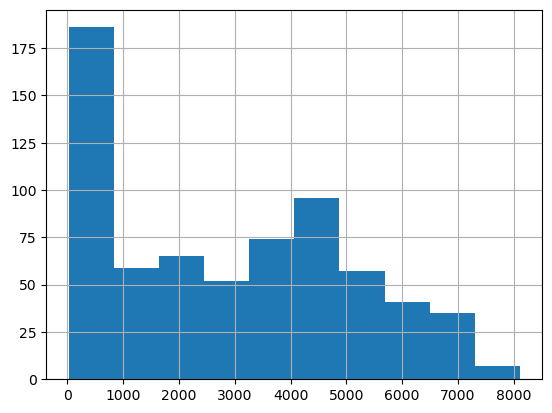

In [17]:
df['step_count'].hist()  #histogram

C:\Users\sabih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step_count', ylabel='Density'>

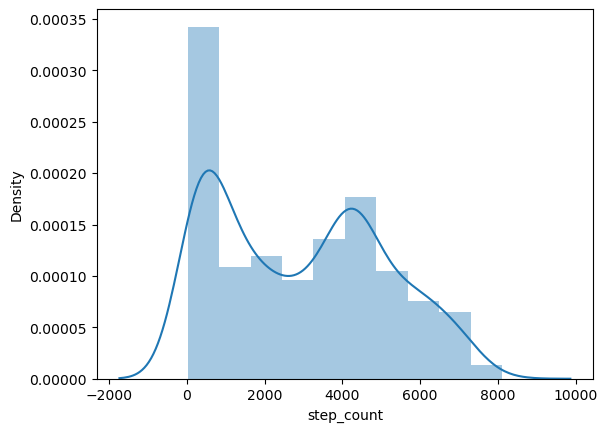

In [18]:
sns.distplot(df['step_count'])  # distant plot

<AxesSubplot:>

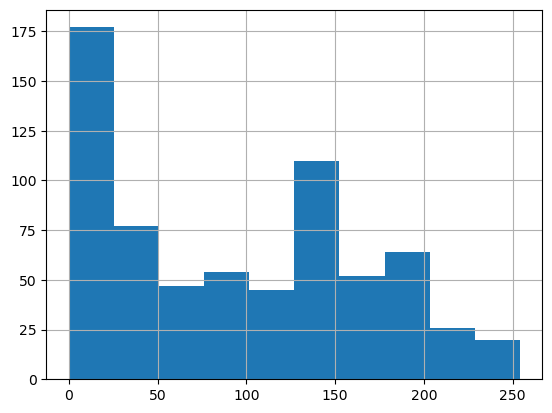

In [19]:
df['calories_burned'].hist()

C:\Users\sabih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='calories_burned', ylabel='Density'>

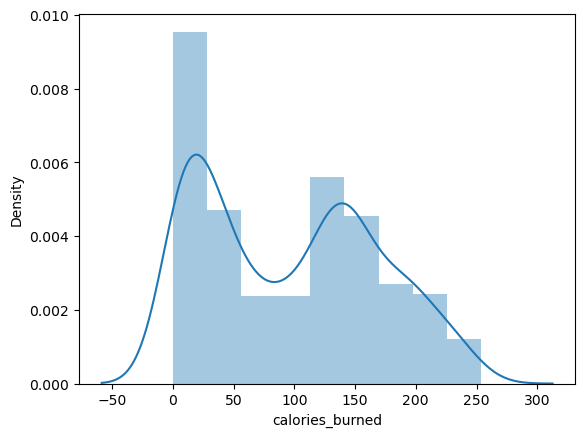

In [20]:
sns.distplot(df['calories_burned'])

<AxesSubplot:>

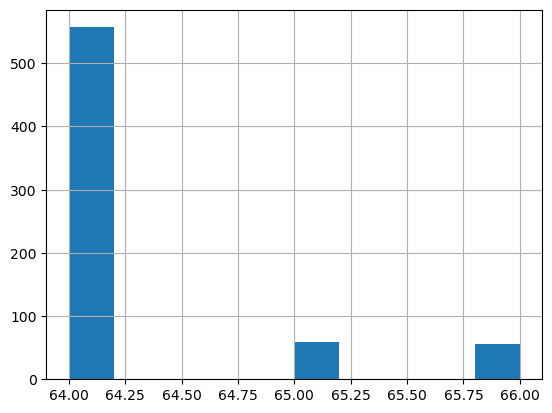

In [21]:
df['weight_kg'].hist()

In [22]:
df['weight_kg'].value_counts()

64    557
65     59
66     56
Name: weight_kg, dtype: int64

<AxesSubplot:>

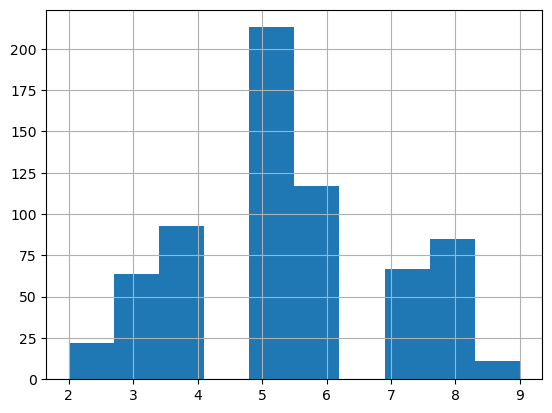

In [23]:
df['hours_of_sleep'].hist()

In [24]:
corr = df.corr()

<AxesSubplot:>

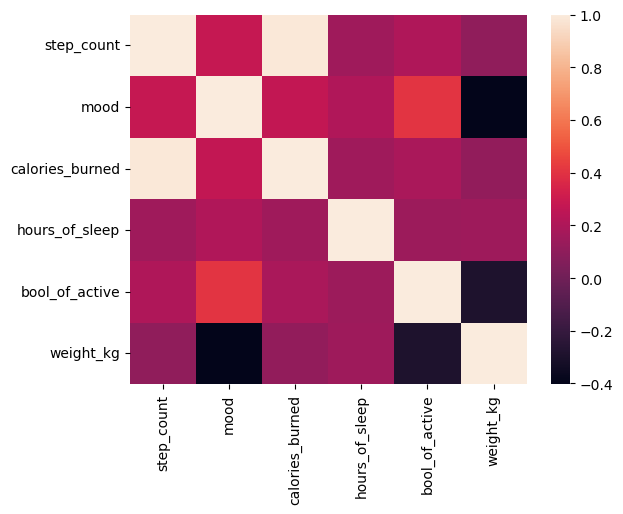

In [25]:
sns.heatmap(corr, xticklabels= corr.columns , yticklabels = corr.columns)

<AxesSubplot:xlabel='step_count', ylabel='calories_burned'>

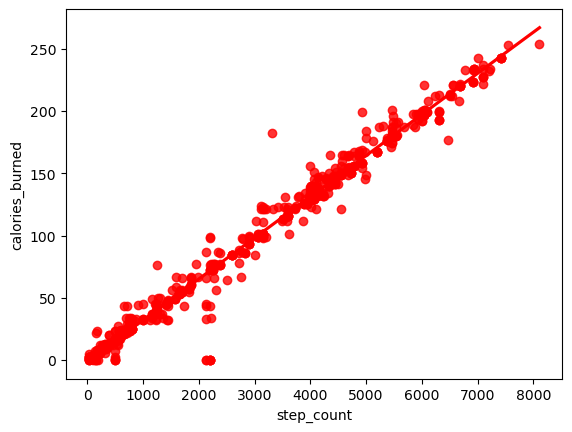

In [26]:
sns.regplot(x='step_count', y='calories_burned', data=df,color='r')

<AxesSubplot:xlabel='weight_kg', ylabel='mood'>

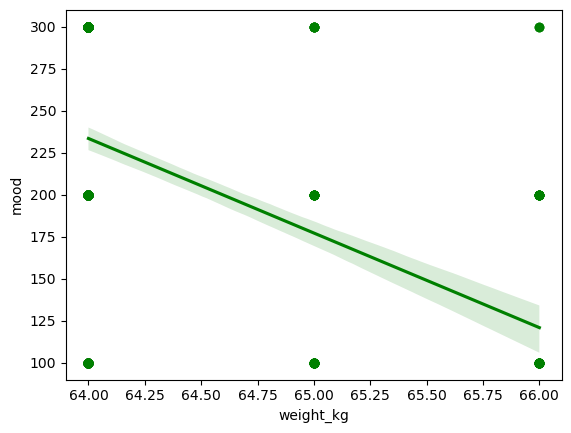

In [27]:
sns.regplot(x='weight_kg', y='mood', data=df,color='g') 

<AxesSubplot:xlabel='mood', ylabel='bool_of_active'>

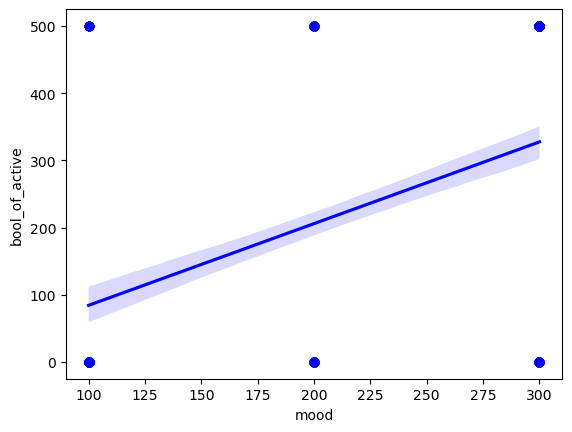

In [28]:
sns.regplot(x='mood', y='bool_of_active', data=df,color='b') 

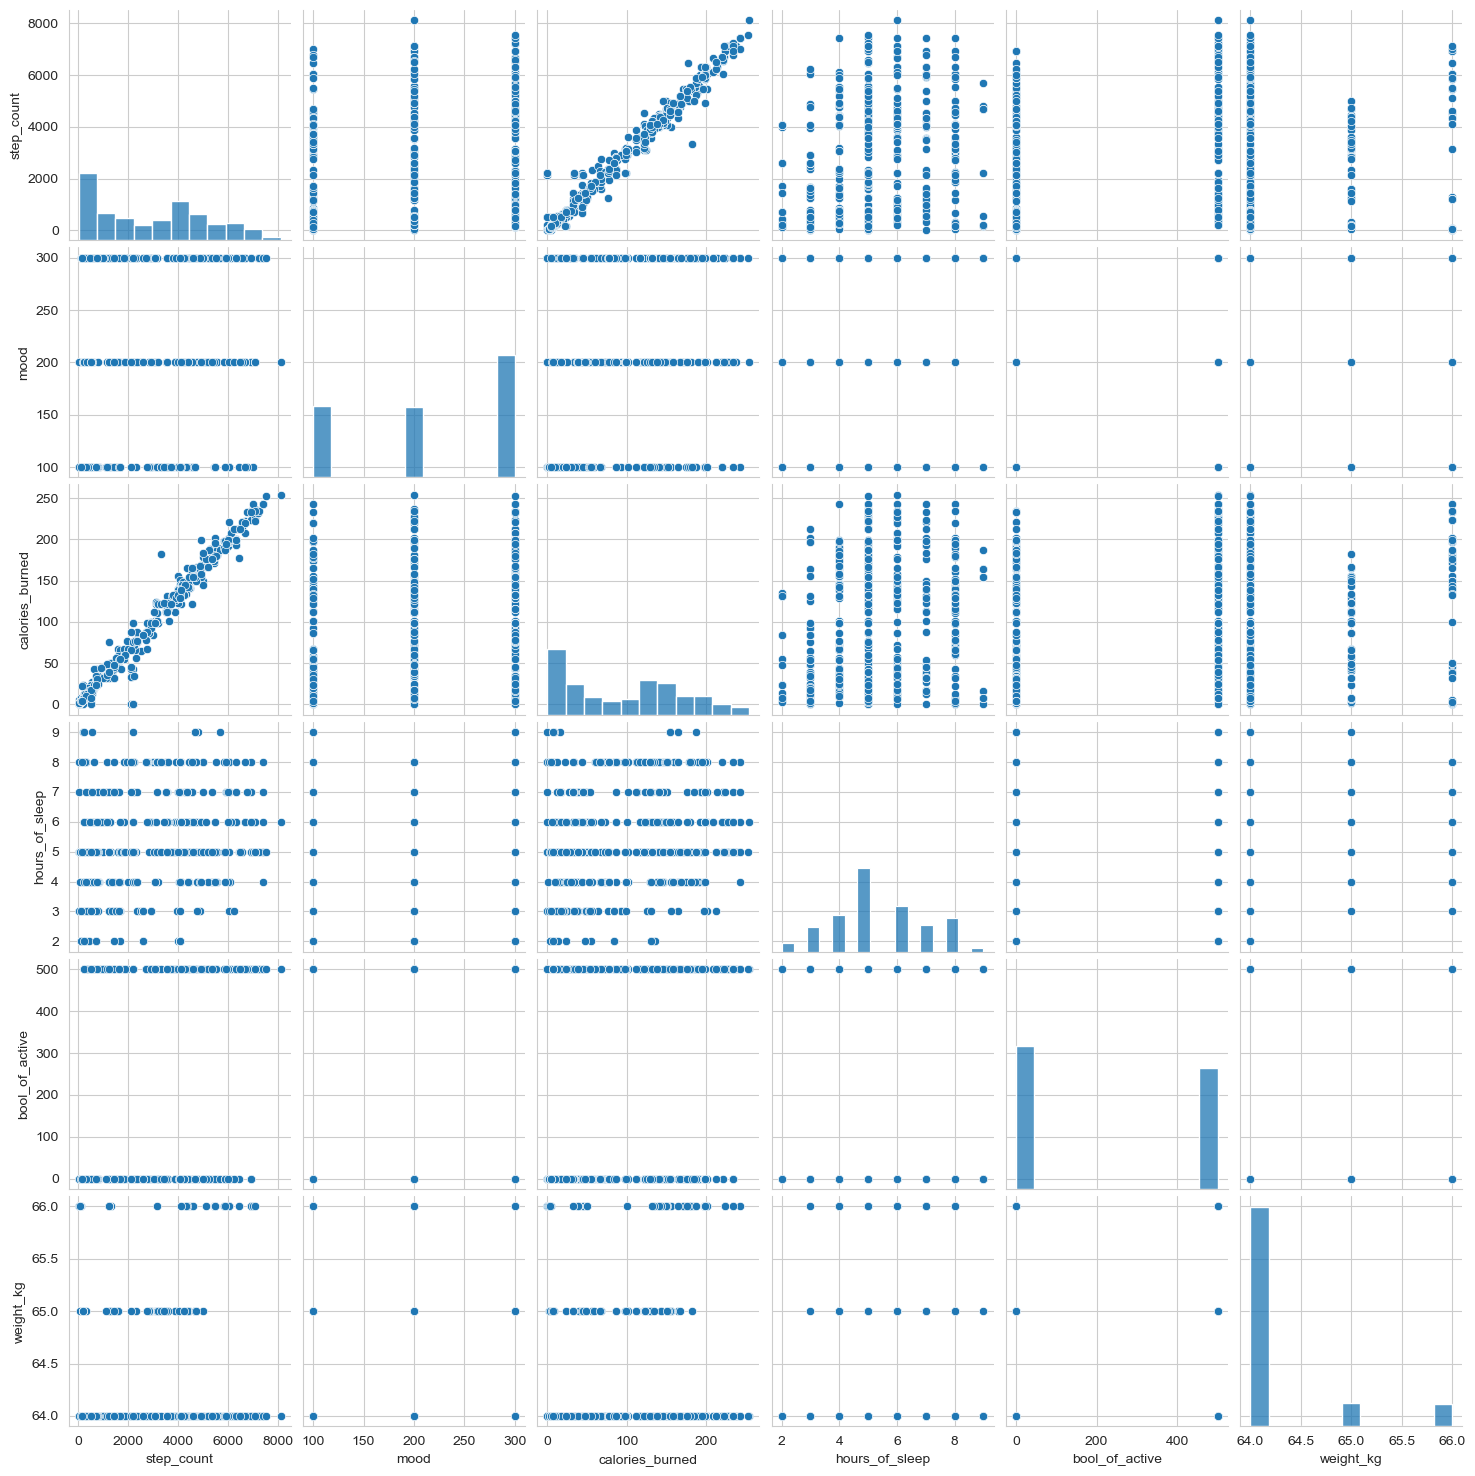

In [29]:
sns.set_style("whitegrid")
sns.pairplot(df) 

# BIVARIATE ANALYSIS

# 1. Step count vs Mood

In [30]:
df.step_count.groupby(df.mood).describe()


,count,mean,std,min,25%,50%,75%,max
mood,,,,,,,,
100,182.0,1990.126374,1970.094038,25.0,299.0,1230.0,3586.0,6999.0
200,179.0,3027.094972,2140.411734,25.0,1163.0,2909.0,4390.5,8109.0
300,311.0,3469.594855,2076.114290,111.0,1425.0,4033.0,4880.0,7543.0


<Figure size 600x500 with 0 Axes>

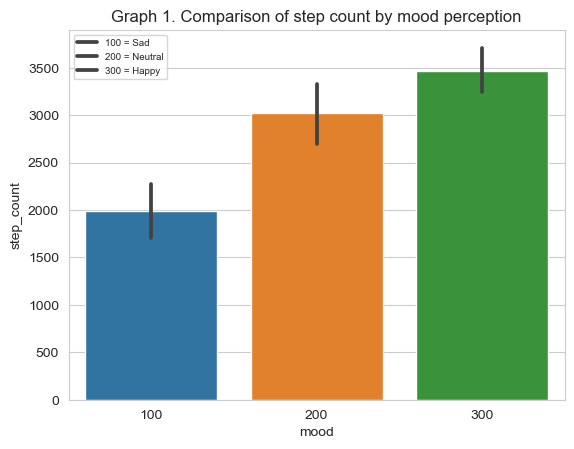

<Figure size 600x500 with 0 Axes>

In [31]:
sns.barplot(x = "mood", y="step_count", data = df)
plt.title('Graph 1. Comparison of step count by mood perception')
plt.legend(['100 = Sad', '200 = Neutral', '300 = Happy'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# 2. Step Count vs Activeness

In [32]:
#Average descriptive statistics_ of step count by Activeness (0 = inactive and 500 = active)
df.step_count.groupby(df.bool_of_active).describe()

,count,mean,std,min,25%,50%,75%,max
bool_of_active,,,,,,,,
0,364.0,2554.241758,1996.747594,25.0,546.0,2255.0,4340.0,6930.0
500,308.0,3419.977273,2235.748340,221.0,1163.0,3608.0,5000.5,8109.0


<Figure size 600x500 with 0 Axes>

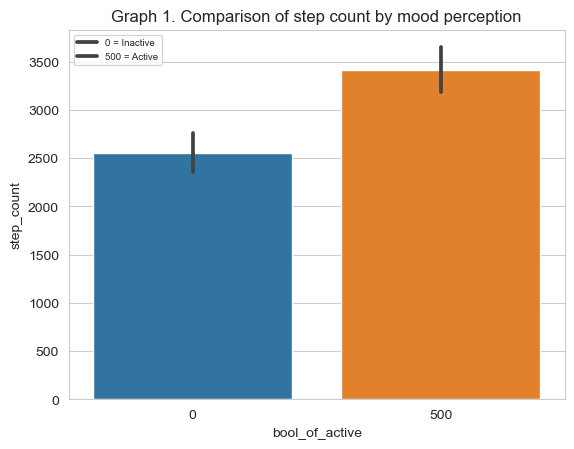

<Figure size 600x500 with 0 Axes>

In [33]:
# bar chart showing the distribution of step count by category of Activeness (0 = inactive and 500 = active)
sns.barplot(x = "bool_of_active", y="step_count", data = df)
plt.title('Graph 1. Comparison of step count by mood perception')
plt.legend(['0 = Inactive', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

In [34]:
#Average descriptive statistics of CALORIES SPENT by mood category (100 = sad, 200 = neutral and 300 = happy)
df.calories_burned.groupby(df.mood).describe()

,count,mean,std,min,25%,50%,75%,max
mood,,,,,,,,
100,182.0,66.252747,65.101042,0.0,11.0,38.5,122.75,243.0
200,179.0,97.474860,72.416424,0.0,33.5,98.0,147.50,254.0
300,311.0,113.610932,69.837275,0.0,43.5,132.0,165.00,253.0


<Figure size 600x500 with 0 Axes>

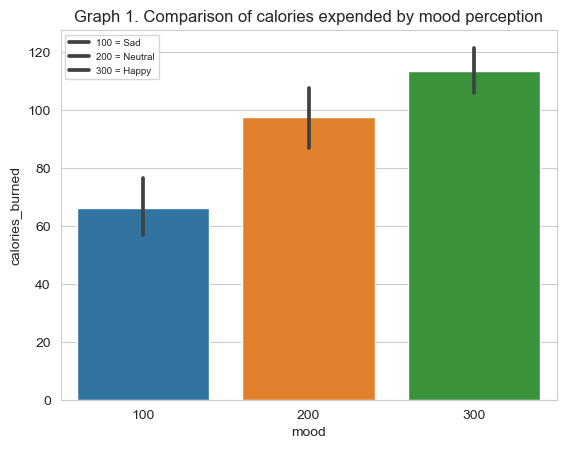

<Figure size 600x500 with 0 Axes>

In [35]:
# bar chart showing the distribution of SPENDED CALORIES by mood category (100 = sad, 200 = neutral and 300 = happy)
sns.barplot(x = "mood", y="calories_burned", data = df)
plt.title('Graph 1. Comparison of calories expended by mood perception')
plt.legend(['100 = Sad', '200 = Neutral', '300 = Happy'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# 4. Calories Burned vs Activeness

In [36]:
#Average descriptive statistics_ of CALORIES SPENT by Activeness (0 = inactive and 500 = active)
df.calories_burned.groupby(df.bool_of_active).describe()

,count,mean,std,min,25%,50%,75%,max
bool_of_active,,,,,,,,
0,364.0,84.030220,66.986506,0.0,19.25,74.5,142.25,234.0
500,308.0,111.207792,74.810656,0.0,35.00,120.0,168.25,254.0


<Figure size 600x500 with 0 Axes>

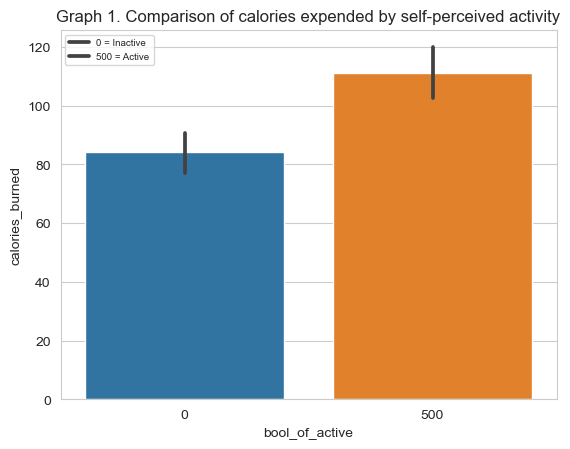

<Figure size 600x500 with 0 Axes>

In [37]:
# bar chart showing the distribution of EXPENDED CALORIES by category of Activeness (0 = inactive and 500 = active)
sns.barplot(x = "bool_of_active", y="calories_burned", data = df)
plt.title('Graph 1. Comparison of calories expended by self-perceived activity')
plt.legend(['0 = Inactive', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# 5. Sleeping Hours vs Mood

In [38]:
#Average descriptive statistics of HOURS OF SLEEP by mood category (100 = sad, 200 = neutral and 300 = happy)
df.hours_of_sleep.groupby(df.mood).describe()

,count,mean,std,min,25%,50%,75%,max
mood,,,,,,,,
100,182.0,5.093407,1.801491,2.0,4.0,5.0,6.0,9.0
200,179.0,4.927374,1.365827,2.0,4.0,5.0,6.0,8.0
300,311.0,5.832797,1.540115,2.0,5.0,6.0,7.0,9.0


<Figure size 600x500 with 0 Axes>

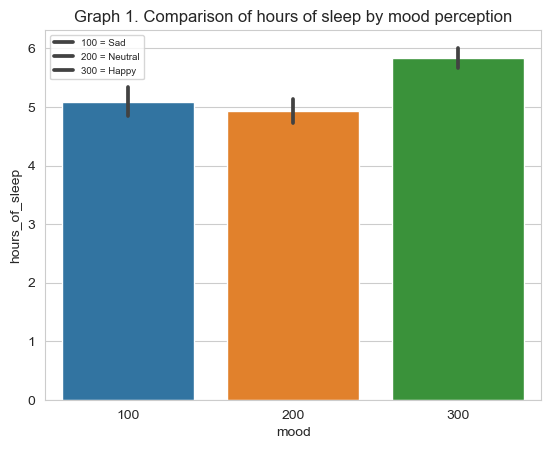

<Figure size 600x500 with 0 Axes>

In [39]:
sns.barplot(x = "mood", y="hours_of_sleep", data = df)
plt.title('Graph 1. Comparison of hours of sleep by mood perception')
plt.legend(['100 = Sad', '200 = Neutral', '300 = Happy'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))


# 6. Sleeping Hours vs Activeness

In [40]:
#Average descriptive statistics of SLEEP HOURS by self-perceived activity (0 = inactive and 500 = active)
df.hours_of_sleep.groupby(df.bool_of_active).describe()

,count,mean,std,min,25%,50%,75%,max
bool_of_active,,,,,,,,
0,364.0,5.178571,1.706730,2.0,4.0,5.0,6.0,9.0
500,308.0,5.642857,1.484682,2.0,5.0,5.0,7.0,9.0


<Figure size 600x500 with 0 Axes>

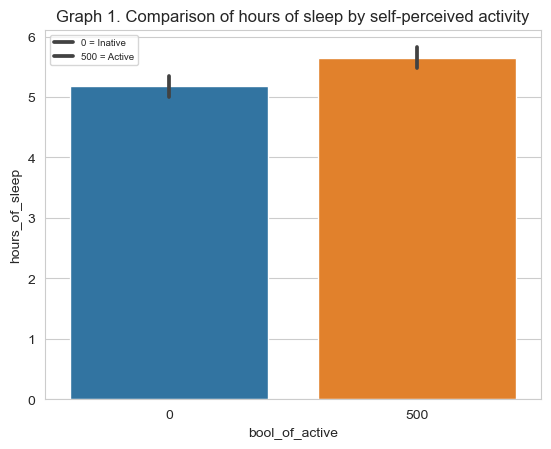

<Figure size 600x500 with 0 Axes>

In [41]:
# bar chart showing the distribution of SLEEP HOURS by category of self-perceived activity (0 = inactive and 500 = active)
sns.barplot(x = "bool_of_active", y="hours_of_sleep", data = df)
plt.title('Graph 1. Comparison of hours of sleep by self-perceived activity')
plt.legend(['0 = Inative', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# 7. Mood vs Activeness

In [42]:
# creating a contingency table between feeling active or inactive (bool_of_activity) x humor (mood) in percentage
pd.crosstab([df. bool_of_active], [df.mood], normalize='index', margins=True)*100

mood,100,200,300
bool_of_active,,,
0,42.582418,26.923077,30.494505
500,8.766234,26.298701,64.935065
All,27.083333,26.636905,46.279762


<Figure size 600x500 with 0 Axes>

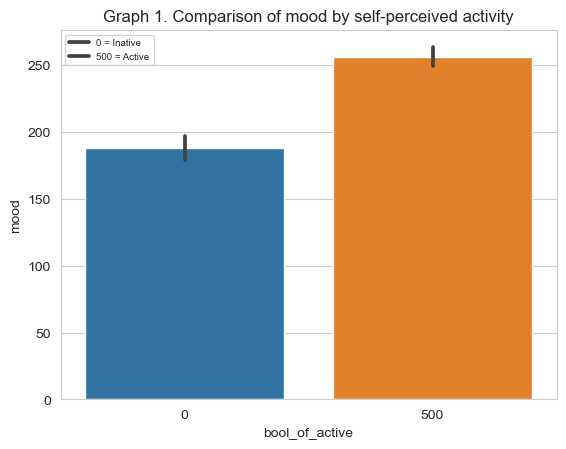

<Figure size 600x500 with 0 Axes>

In [43]:
# bar chart showing the distribution of MOOD by category of self-perceived activity (0 = inactive and 500 = active)
sns.barplot(x = "bool_of_active", y="mood", data = df)
plt.title('Graph 1. Comparison of mood by self-perceived activity')
plt.legend(['0 = Inative', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# OBSERVATION

# Mood vs Weight

In [44]:
#Average descriptive statistics of MOOD by Weight
df.weight_kg.groupby(df.mood).describe()

,count,mean,std,min,25%,50%,75%,max
mood,,,,,,,,
100,182.0,64.637363,0.821217,64.0,64.0,64.0,65.0,66.0
200,179.0,64.229050,0.568899,64.0,64.0,64.0,64.0,66.0
300,311.0,64.045016,0.249966,64.0,64.0,64.0,64.0,66.0


<Figure size 600x500 with 0 Axes>

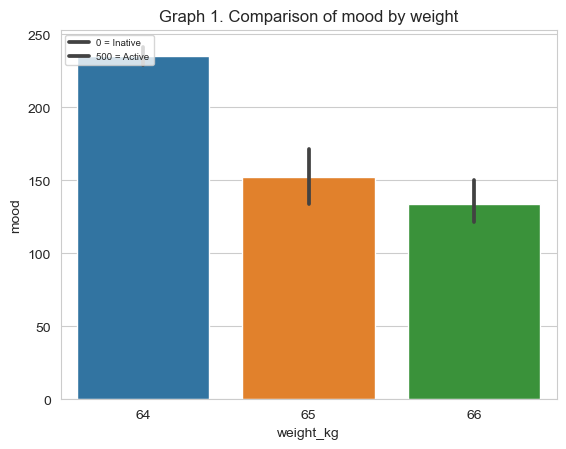

<Figure size 600x500 with 0 Axes>

In [45]:
sns.barplot(x = "weight_kg", y="mood", data = df)
plt.title('Graph 1. Comparison of mood by weight')
plt.legend(['0 = Inative', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))


# Final Observation :
We want to predict whether a person is active or inactive which is a Binary classification problem based on hours slept, mood, daily step count, calories burned and weight.

In [46]:
df.isnull().any()   #taking care of missing values

date               False
step_count         False
mood               False
calories_burned    False
hours_of_sleep     False
bool_of_active     False
weight_kg          False
dtype: bool

# Outlier analysis using Boxplot

<AxesSubplot:>

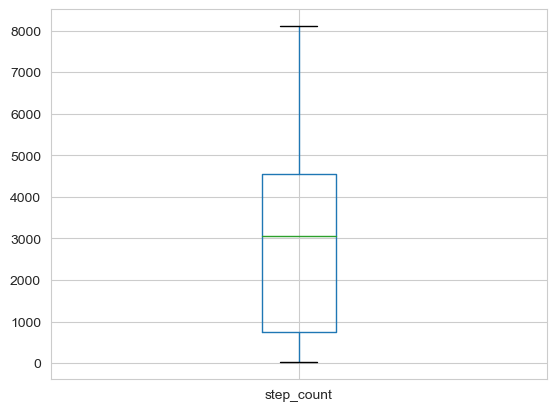

In [47]:
df.boxplot(column="step_count")

<AxesSubplot:>

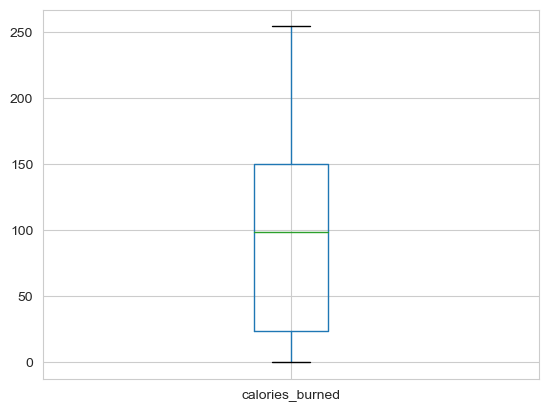

In [48]:
df.boxplot(column="calories_burned")

# Label Encoding

"Mood" and "bool_of_active" are categorical variables but they are represented as

--> bool_of_active : Active - 500 and Inactive - 0

--> mood : 100 - sad, 200 - neutral and 300 - happy

Encode mood values as

--> 100 - 0, 200 - 1 and 300 - 2

Encode bool_of_active values as

--> 0 - 0 and 500 - 1

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['bool_of_active']=le.fit_transform(df['bool_of_active'])
df

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,06-10-2017,5464,200,181,5,0,66
1,07-10-2017,6041,100,197,8,0,66
2,08-10-2017,25,100,0,5,0,66
3,09-10-2017,5461,100,174,4,0,66
4,10-10-2017,6915,200,223,5,1,66
...,...,...,...,...,...,...,...
667,04-08-2019,133,100,4,3,0,64
668,05-08-2019,153,300,4,8,0,64
669,06-08-2019,500,200,7,5,1,64
670,07-08-2019,2127,200,87,5,0,64


In [50]:
df['mood']=le.fit_transform(df['mood'])
df

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,06-10-2017,5464,1,181,5,0,66
1,07-10-2017,6041,0,197,8,0,66
2,08-10-2017,25,0,0,5,0,66
3,09-10-2017,5461,0,174,4,0,66
4,10-10-2017,6915,1,223,5,1,66
...,...,...,...,...,...,...,...
667,04-08-2019,133,0,4,3,0,64
668,05-08-2019,153,2,4,8,0,64
669,06-08-2019,500,1,7,5,1,64
670,07-08-2019,2127,1,87,5,0,64


# Dependent and Independent variable

In [51]:
#Independent variables
x=df.iloc[:,[1,2,3,4,6]]
x

,step_count,mood,calories_burned,hours_of_sleep,weight_kg
0,5464,1,181,5,66
1,6041,0,197,8,66
2,25,0,0,5,66
3,5461,0,174,4,66
4,6915,1,223,5,66
...,...,...,...,...,...
667,133,0,4,3,64
668,153,2,4,8,64
669,500,1,7,5,64
670,2127,1,87,5,64


In [52]:
#Dependent Variable
y=df.iloc[:,5]
y

0      0
1      0
2      0
3      0
4      1
      ..
667    0
668    0
669    1
670    0
671    1
Name: bool_of_active, Length: 672, dtype: int64

# Onehot encoding :

sad(0) --> 0 0

neutral(1) --> 1 0

happy(2) --> 0 1

In [53]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
x_encoded = oh.fit_transform(x).toarray()

In [54]:
x

,step_count,mood,calories_burned,hours_of_sleep,weight_kg
0,5464,1,181,5,66
1,6041,0,197,8,66
2,25,0,0,5,66
3,5461,0,174,4,66
4,6915,1,223,5,66
...,...,...,...,...,...
667,133,0,4,3,64
668,153,2,4,8,64
669,500,1,7,5,64
670,2127,1,87,5,64


# Splitting dataset into train and test sets (90-10) :

In [55]:
#Splitting the dataset into Train set and Test set

from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)
x_train1=x_train
x_test1=x_test

# Feature Scaling

In [56]:
#Apply normalization to rescale the features to a standard range of values.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [57]:
x_train

array([[-1.15992048, -0.24183321, -1.26376434, -0.24541261, -0.42761284],
       [ 0.07183731,  0.9554394 ,  0.05451824, -0.24541261, -0.42761284],
       [ 0.66492329, -0.24183321,  0.64353811, -0.85540938,  1.24951803],
       ...,
       [ 1.17294701,  0.9554394 ,  1.17646086, -0.24541261,  2.92664889],
       [-0.84833886, -1.43910581, -0.87108442,  0.36458416, -0.42761284],
       [-1.04102131, -1.43910581, -0.9692544 , -0.24541261, -0.42761284]])

In [58]:

x_test

array([[ 0.54273442, -1.43910581,  0.489271  ,  0.36458416,  2.92664889],
       [-1.25767158, -0.24183321, -1.20766721, -0.24541261, -0.42761284],
       [-0.65236672, -1.43910581, -0.67474446, -0.24541261,  1.24951803],
       [-1.01893332, -1.43910581, -1.01132725, -0.85540938, -0.42761284],
       [ 0.28519788, -0.24183321,  0.26488248, -0.24541261, -0.42761284],
       [ 2.09312319,  0.9554394 ,  2.04596638,  1.5845777 , -0.42761284],
       [ 0.67197264,  0.9554394 ,  0.71365953, -0.24541261, -0.42761284],
       [ 0.04598967,  0.9554394 ,  0.02646967, -0.85540938, -0.42761284],
       [ 1.65982266, -0.24183321,  1.61121362, -0.24541261, -0.42761284],
       [ 0.08922573, -0.24183321,  0.05451824, -0.24541261, -0.42761284],
       [-1.14159215,  0.9554394 , -1.13754579, -0.24541261, -0.42761284],
       [ 0.67197264, -0.24183321,  0.69963524, -0.85540938, -0.42761284],
       [-1.11339472, -1.43910581, -1.03937581, -0.85540938, -0.42761284],
       [ 0.91635038,  0.9554394 ,  0.7

# Model Building :

# Training Model
1. KNN Classification

In [59]:
import pickle

In [60]:
#Fitting Classifier to the Training set
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train1,y_train)


KNeighborsClassifier()

In [61]:
#Saving model
pickle.dump(knn, open('knnmodel.pkl','wb'))


In [62]:
knn_y_train=knn.predict(x_train1)
knn_y_train

C:\Users\sabih\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,

In [63]:
knn.score(x_train1,y_train)*100

C:\Users\sabih\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


85.9271523178808

In [64]:
#confusion matrix
from sklearn.metrics import confusion_matrix
knn_cm_train = confusion_matrix(y_train,knn_y_train)
knn_cm_train

array([[286,  40],
       [ 45, 233]], dtype=int64)

In [65]:
#Cross Validation
from sklearn.model_selection import cross_val_score, cross_val_predict
knn_acc = cross_val_score(knn, x_train1, y_train, cv=6, scoring='accuracy', n_jobs=-1)
knn_proba = cross_val_predict(knn, x_train1, y_train, cv=6, method='predict_proba')
knn_scores = knn_proba[:, 1]

In [66]:
knn_acc*100

array([84.15841584, 75.24752475, 78.21782178, 73.26732673, 78.        ,
       82.        ])

In [67]:
knn_acc.mean()*100

78.48184818481849

# 2. Logistic Regression Classification

In [68]:
from sklearn.linear_model.logistic import LogisticRegression
lg =LogisticRegression(solver='lbfgs')
lg.fit(x_train1, y_train)

ModuleNotFoundError: No module named 'sklearn.linear_model.logistic'

# 3. Naive Bayes Classification

In [69]:
from sklearn.naive_bayes import GaussianNB
nb =GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [70]:
pickle.dump(nb, open('nbmodel.pkl','wb'))

In [71]:
nb_y_train=nb.predict(x_train)  #for train
nb_y_train

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,

In [72]:
nb.score(x_train,y_train)*100

67.71523178807946

In [73]:
confusion_matrix(y_train,nb_y_train)

array([[178, 148],
       [ 47, 231]], dtype=int64)

In [74]:
nb_acc = cross_val_score(nb, x_train, y_train, cv=6, scoring='accuracy', n_jobs=-1)
nb_proba = cross_val_predict(nb, x_train, y_train, cv=6, method='predict_proba')
nb_scores = nb_proba[:, 1]

In [75]:
nb_acc*100

array([69.30693069, 70.2970297 , 61.38613861, 66.33663366, 71.        ,
       70.        ])

In [76]:
nb_acc.mean()*100

68.05445544554455

# 4. Support Vector Machines Classification 

In [77]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',probability=True,degree=3,gamma='auto')
svc.fit(x_train,y_train)

SVC(gamma='auto', probability=True)

In [78]:
pickle.dump(svc, open('svcmodel.pkl','wb'))

In [79]:
svc_y_train=svc.predict(x_train)
svc_y_train

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,

In [80]:
svc.score(x_train,y_train)*100

73.84105960264901

In [81]:
svc_cm_train = confusion_matrix(y_train, svc_y_train)
svc_cm_train

array([[208, 118],
       [ 40, 238]], dtype=int64)

In [82]:
svm_acc = cross_val_score(svc, x_train, y_train, cv=6, scoring='accuracy', n_jobs=-1)
svm_proba = cross_val_predict(svc, x_train, y_train, cv=6, method='predict_proba')
svm_scores = svm_proba[:, 1]

In [83]:
svm_acc*100

array([78.21782178, 71.28712871, 67.32673267, 71.28712871, 76.        ,
       66.        ])

In [84]:
svm_acc.mean()*100

71.68646864686468

# 5. Decision Tree Classification 

In [85]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=12)   #max_leaf_nodes=26  max_depth=12
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12)

In [86]:
pickle.dump(dtc, open('dtcmodel.pkl','wb'))

In [87]:

dtc.score(x_train,y_train)*100

95.69536423841059

In [88]:
dtc_y_train=dtc.predict(x_train)
dtc_y_train

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,

In [89]:
confusion_matrix(y_train, dtc_y_train)

array([[314,  12],
       [ 14, 264]], dtype=int64)

In [90]:
#Print cross validation score for Decision Tree Calssifier
dtc_clf_acc = cross_val_score(dtc, x_train, y_train, cv=5, scoring="accuracy",  n_jobs=-1)
dtc_proba = cross_val_predict(dtc, x_train, y_train, cv=5, method='predict_proba')
dtc_scores = dtc_proba[:, 1]

In [91]:
dtc_clf_acc*100

array([81.81818182, 76.03305785, 86.7768595 , 80.16528926, 78.33333333])

In [92]:
dtc_clf_acc.mean()*100

80.62534435261706

# 6. Random Forest Classification

In [93]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=12,n_estimators=10,random_state=0)  #max_depth=12
rmf.fit(x_train, y_train)


RandomForestClassifier(max_depth=12, n_estimators=10, random_state=0)

In [94]:
pickle.dump(rmf, open('rmfmodel.pkl','wb'))

In [95]:

rmf.score(x_train,y_train)*100

96.68874172185431

In [96]:
rmf_y_train=rmf.predict(x_train)
rmf_y_train

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,

In [97]:
confusion_matrix(y_train, rmf_y_train)

array([[312,  14],
       [  6, 272]], dtype=int64)

In [98]:
rmf_clf_acc = cross_val_score(rmf, x_train, y_train, cv=5, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf, x_train, y_train, cv=5, method='predict_proba')
rmf_scores = rmf_proba[:, 1]

In [99]:
rmf_clf_acc*100

array([85.12396694, 82.6446281 , 85.12396694, 83.47107438, 75.83333333])

In [100]:

rmf_clf_acc.mean()*100

82.43939393939395

# 7. Gradient Boosting Classification

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(max_depth=3)
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [102]:
pickle.dump(gb, open('gbmodel.pkl','wb'))

In [103]:

gb.score(x_train,y_train)*100

94.5364238410596

In [104]:
gb_y_train=gb.predict(x_train)
gb_y_train


array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,

In [105]:
confusion_matrix(y_train, gb_y_train)

array([[308,  18],
       [ 15, 263]], dtype=int64)

In [106]:
gb_clf_acc = cross_val_score(gb, x_train, y_train, cv=4, scoring="accuracy",  n_jobs=-1)
gb_proba = cross_val_predict(gb, x_train, y_train, cv=4, method='predict_proba')
gb_scores = gb_proba[:, 1]

In [107]:
gb_clf_acc*100

array([86.09271523, 88.0794702 , 80.79470199, 79.47019868])

In [108]:
gb_clf_acc.mean()*100

83.6092715231788

# ROC Curves on Train data:

In [109]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [110]:
def ROC_curve(title, y_train, scores, y_train_pred, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)*100))
    print()
    print('Train Accuracy : ',accuracy_score(y_train,y_train_pred)*100)
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (kNN): 83.72 

Train Accuracy :  85.9271523178808


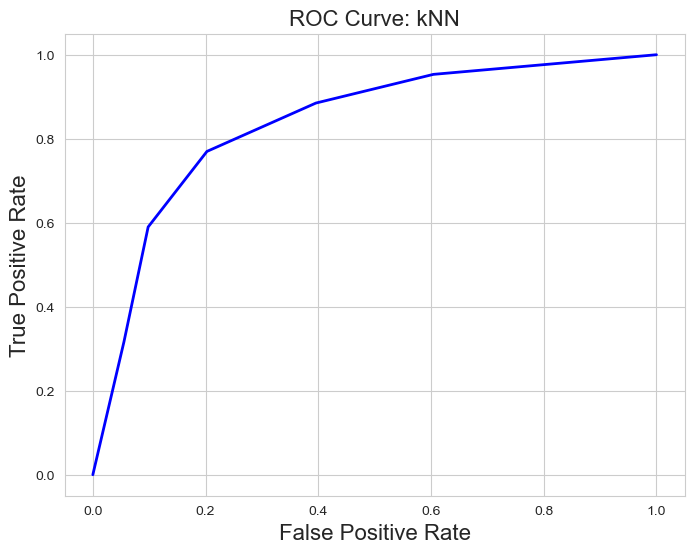

AUC Score (Naive Bayes): 73.86 

Train Accuracy :  67.71523178807946


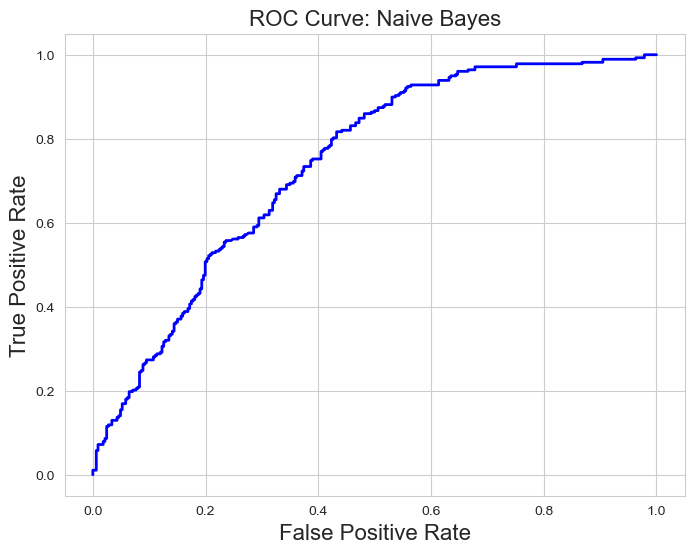

AUC Score (Support Vector Classifiaction): 77.53 

Train Accuracy :  73.84105960264901


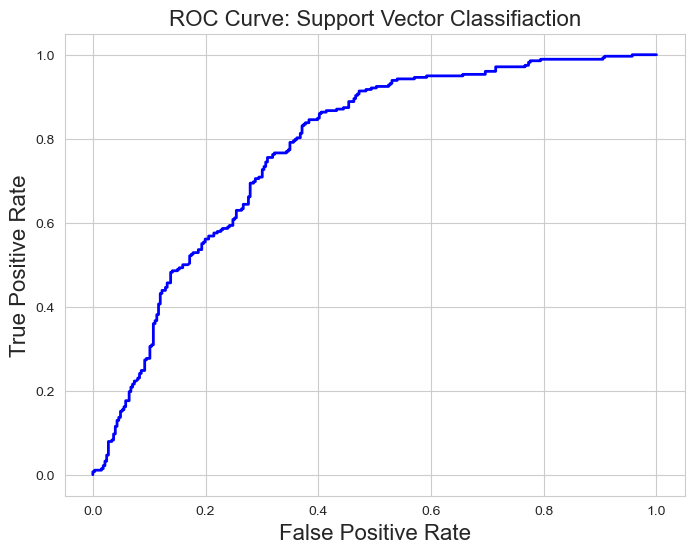

AUC Score (Decision Tree Calssifier): 81.36 

Train Accuracy :  95.69536423841059


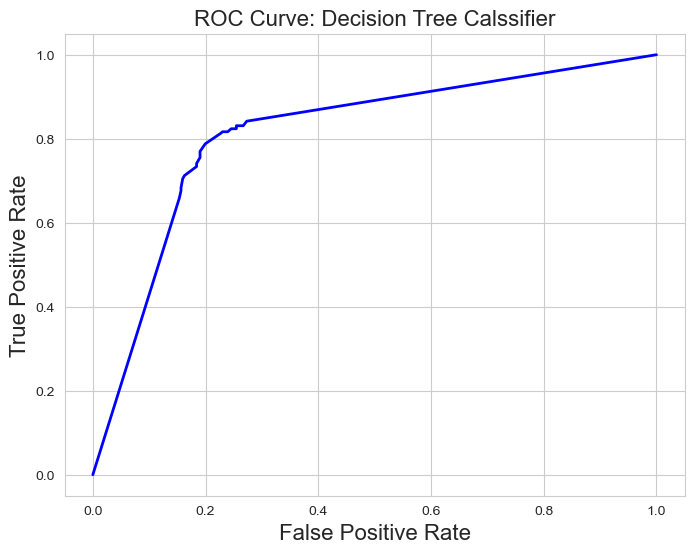

AUC Score (Random Forest Classifier): 89.83 

Train Accuracy :  96.68874172185431


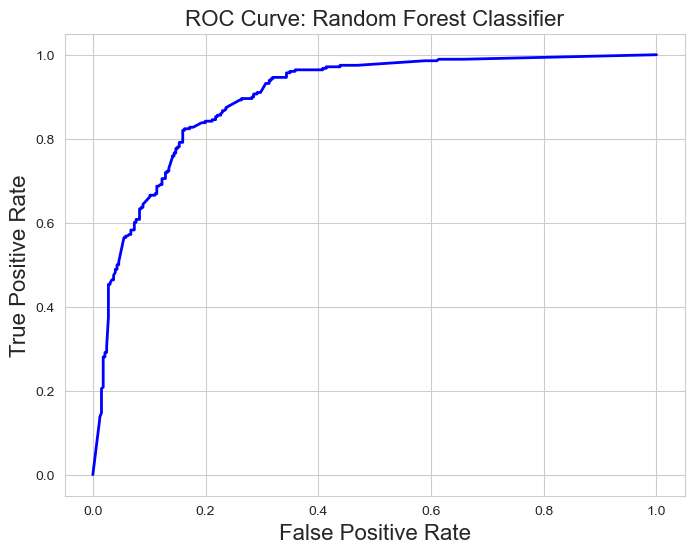

AUC Score (Gradient Boosting Classifier): 90.21 

Train Accuracy :  94.5364238410596


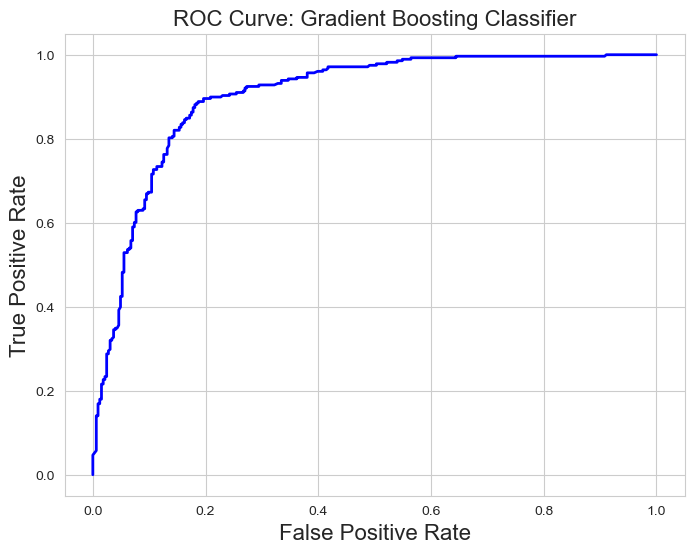

In [111]:
ROC_curve('kNN',y_train,knn_scores,knn_y_train)
# ROC_curve('Logistic Regression',y_train,lg_scores,lg_y_train)
ROC_curve('Naive Bayes',y_train,nb_scores,nb_y_train)
ROC_curve('Support Vector Classifiaction',y_train,svm_scores,svc_y_train)
ROC_curve('Decision Tree Calssifier',y_train,dtc_scores,dtc_y_train)
ROC_curve('Random Forest Classifier',y_train,rmf_scores,rmf_y_train)
ROC_curve('Gradient Boosting Classifier',y_train,gb_scores,gb_y_train)


# Observations :
Top performance Algorithms on train data :

Gradient Boosting Classifier

Random Forest Classifier

KNN Classifier

Decision Tree Classifier

On this traindata, Gradient Boosting Classifer gives more accuracy and ROC score.

In [112]:
import speech_recognition as sr
import pyttsx3
import pywhatkit
import pyaudio as pa 
import wikipedia
import pyjokes
import datetime

In [ ]:
listener = sr.Recognizer() 
engine = pyttsx3.init()
voices = engine.getProperty('voices')
engine.setProperty('voice', voices[1].id)

In [ ]:
def talk(text):
    engine.say(text)
    engine.runAndWait()

# Predicting new values :

In [ ]:
rmf_y_new1 = gb.predict(scaler.transform(np.array([[0,6041,197,8,66]])))


In [ ]:
def run_alexa():
    if rmf_y_new1 == 'array[0]':
        talk('INACTIVE ' )
    
        
    elif rmf_y_new1 == 'array[1]':
        talk('ACTIVE')
        
    else:
        talk('Cannot Predict.')

In [ ]:
rmf_y_new2 = gb.predict(scaler.transform(np.array([[1,0,6915,223,66]])))

In [ ]:
rmf_y_new2

# arr[0] ---> Inactive , arr[1] ---> Active

In [159]:
rmf_y_new3 = gb.predict(scaler.transform(np.array([[6915,200,223,5,66]])))

C:\Users\sabih\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [160]:
rmf_y_new3

array([1], dtype=int64)

In [161]:
rmf_y_new4 = gb.predict(scaler.transform(np.array([[300,200,120,11,59]])))

C:\Users\sabih\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [162]:
rmf_y_new4

array([0], dtype=int64)